In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Vaishnavi1257/DSBDAL/refs/heads/main/diabeties.csv')

In [3]:
dataset

,Age,BMI,Blood Pressure,Glucose Level,Insulin,Outcome
0,25,22.0,80,95,15,0
1,32,27.8,85,120,40,0
2,47,30.5,90,150,60,1
3,55,31.2,88,110,55,1
4,29,24.7,78,100,20,0
5,60,35.0,95,180,70,1
6,40,28.4,82,125,45,0
7,70,34.6,92,160,65,1
8,50,29.0,89,140,50,1
9,38,23.6,85,105,25,0


In [4]:
dataset.head()

,Age,BMI,Blood Pressure,Glucose Level,Insulin,Outcome
0,25,22.0,80,95,15,0
1,32,27.8,85,120,40,0
2,47,30.5,90,150,60,1
3,55,31.2,88,110,55,1
4,29,24.7,78,100,20,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48 non-null     int64  
 1   BMI             48 non-null     float64
 2   Blood Pressure  48 non-null     int64  
 3   Glucose Level   48 non-null     int64  
 4   Insulin         48 non-null     int64  
 5   Outcome         48 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 2.4 KB


In [6]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

print(X[:3, :])
print('-'*15)
print(y[:3])

[[ 80  95]
 [ 85 120]
 [ 90 150]]
---------------
[15 40 60]


In [7]:
dataset.tail()

,Age,BMI,Blood Pressure,Glucose Level,Insulin,Outcome
43,43,32.8,86,125,50,0
44,32,27.6,87,110,40,0
45,47,33.2,92,145,60,1
46,41,30.0,84,130,55,0
47,60,36.4,90,155,65,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(y_test[:3])

[[ 91 130]
 [ 87 115]
 [ 90 155]]
---------------
[50 40 65]
---------------
[[ 84 125]
 [ 78 100]
 [ 92 145]]
---------------
[35 20 65]


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 0.91036648 -0.13922034]
 [-0.08276059 -0.86911336]
 [ 0.66208471  1.07726804]]
---------------
[[-0.82760589 -0.38251801]
 [-2.31729649 -1.59900639]
 [ 1.15864824  0.59067269]]


In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.82760589 -0.38251801]
 [-2.31729649 -1.59900639]
 [ 1.15864824  0.59067269]
 [ 1.40693001  0.83397037]
 [-0.57932412 -0.86911336]
 [-0.33104236 -0.62581569]
 [ 0.16552118 -0.38251801]
 [ 0.41380294  0.83397037]
 [ 1.15864824  1.32056572]
 [-0.08276059 -0.13922034]]
---------------
[45 20 60 60 40 50 50 60 60 50]


In [12]:
print(y_pred[:20])
print(y_test[:20])

[45 20 60 60 40 50 50 60 60 50 40 40]
[35 20 65 65 40 40 45 65 65 50 35 30]


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

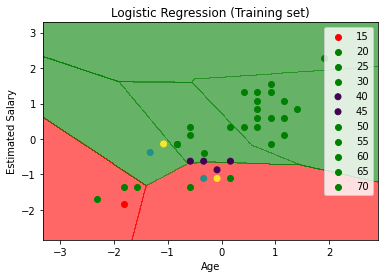

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

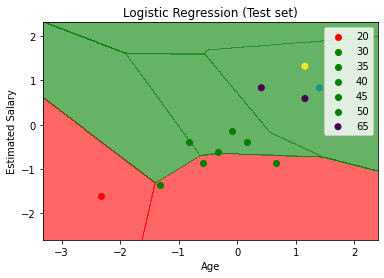

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()